#  Hierarchical-Clustering- Airline Data - Assignment - 7.2
 

In [135]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

# Understanding The  Data 

In [97]:
h_air=pd.read_excel("EastWestAirlines.xlsx",1)
h_air.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [98]:
h_air.shape

(3999, 12)

In [99]:
h_air.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1539,1554,133853,0,5,1,1,68136,14,0,0,4960,1
1082,1094,8719,0,1,1,1,2000,9,0,0,5671,0
88,91,62553,0,2,1,1,7672,16,700,1,6819,0
2476,2495,98339,0,3,1,1,16336,13,0,0,3145,0
2559,2578,138008,5368,4,1,1,34178,14,200,1,2962,0


# Data Pre-Processing 

In [100]:
h_air.drop('ID#',axis=1,inplace=True)
h_air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# # EDA


In [101]:
h_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [102]:
h_air.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [103]:
h_air.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [104]:
h_air.duplicated().sum()

1

In [105]:
h_air.shape

(3999, 11)

In [106]:
h_air.drop_duplicates(keep=False,inplace=True)

In [107]:
h_air.duplicated().sum()

0

In [108]:
h_air.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108670,0.338160,-0.008840,0.035225,0.403334,0.324660,0.217466,0.255611,0.262821,0.178267
Qual_miles,0.108670,1.000000,0.007861,-0.013932,-0.007785,0.030959,0.050631,0.126748,0.143977,0.017205,0.095200
cc1_miles,0.338160,0.007861,1.000000,-0.068271,0.060540,0.825153,0.608790,0.037250,0.041201,0.230499,0.335260
cc2_miles,-0.008840,-0.013932,-0.068271,1.000000,-0.006169,-0.004004,0.064363,0.010582,0.028267,-0.005870,0.005295
cc3_miles,0.035225,-0.007785,0.060540,-0.006169,1.000000,0.204138,0.097311,-0.001788,-0.001128,0.010798,0.023464
Bonus_miles,0.403334,0.030959,0.825153,-0.004004,0.204138,1.000000,0.603048,0.183448,0.185162,0.210068,0.373336
Bonus_trans,0.324660,0.050631,0.608790,0.064363,0.097311,0.603048,1.000000,0.377165,0.432318,0.160643,0.333600
Flight_miles_12mo,0.217466,0.126748,0.037250,0.010582,-0.001788,0.183448,0.377165,1.000000,0.869185,0.037085,0.217627
Flight_trans_12,0.255611,0.143977,0.041201,0.028267,-0.001128,0.185162,0.432318,0.869185,1.000000,0.059063,0.247815
Days_since_enroll,0.262821,0.017205,0.230499,-0.005870,0.010798,0.210068,0.160643,0.037085,0.059063,1.000000,0.187750


In [109]:
h_air.corr()['Award?']

Balance              0.178267
Qual_miles           0.095200
cc1_miles            0.335260
cc2_miles            0.005295
cc3_miles            0.023464
Bonus_miles          0.373336
Bonus_trans          0.333600
Flight_miles_12mo    0.217627
Flight_trans_12      0.247815
Days_since_enroll    0.187750
Award?               1.000000
Name: Award?, dtype: float64

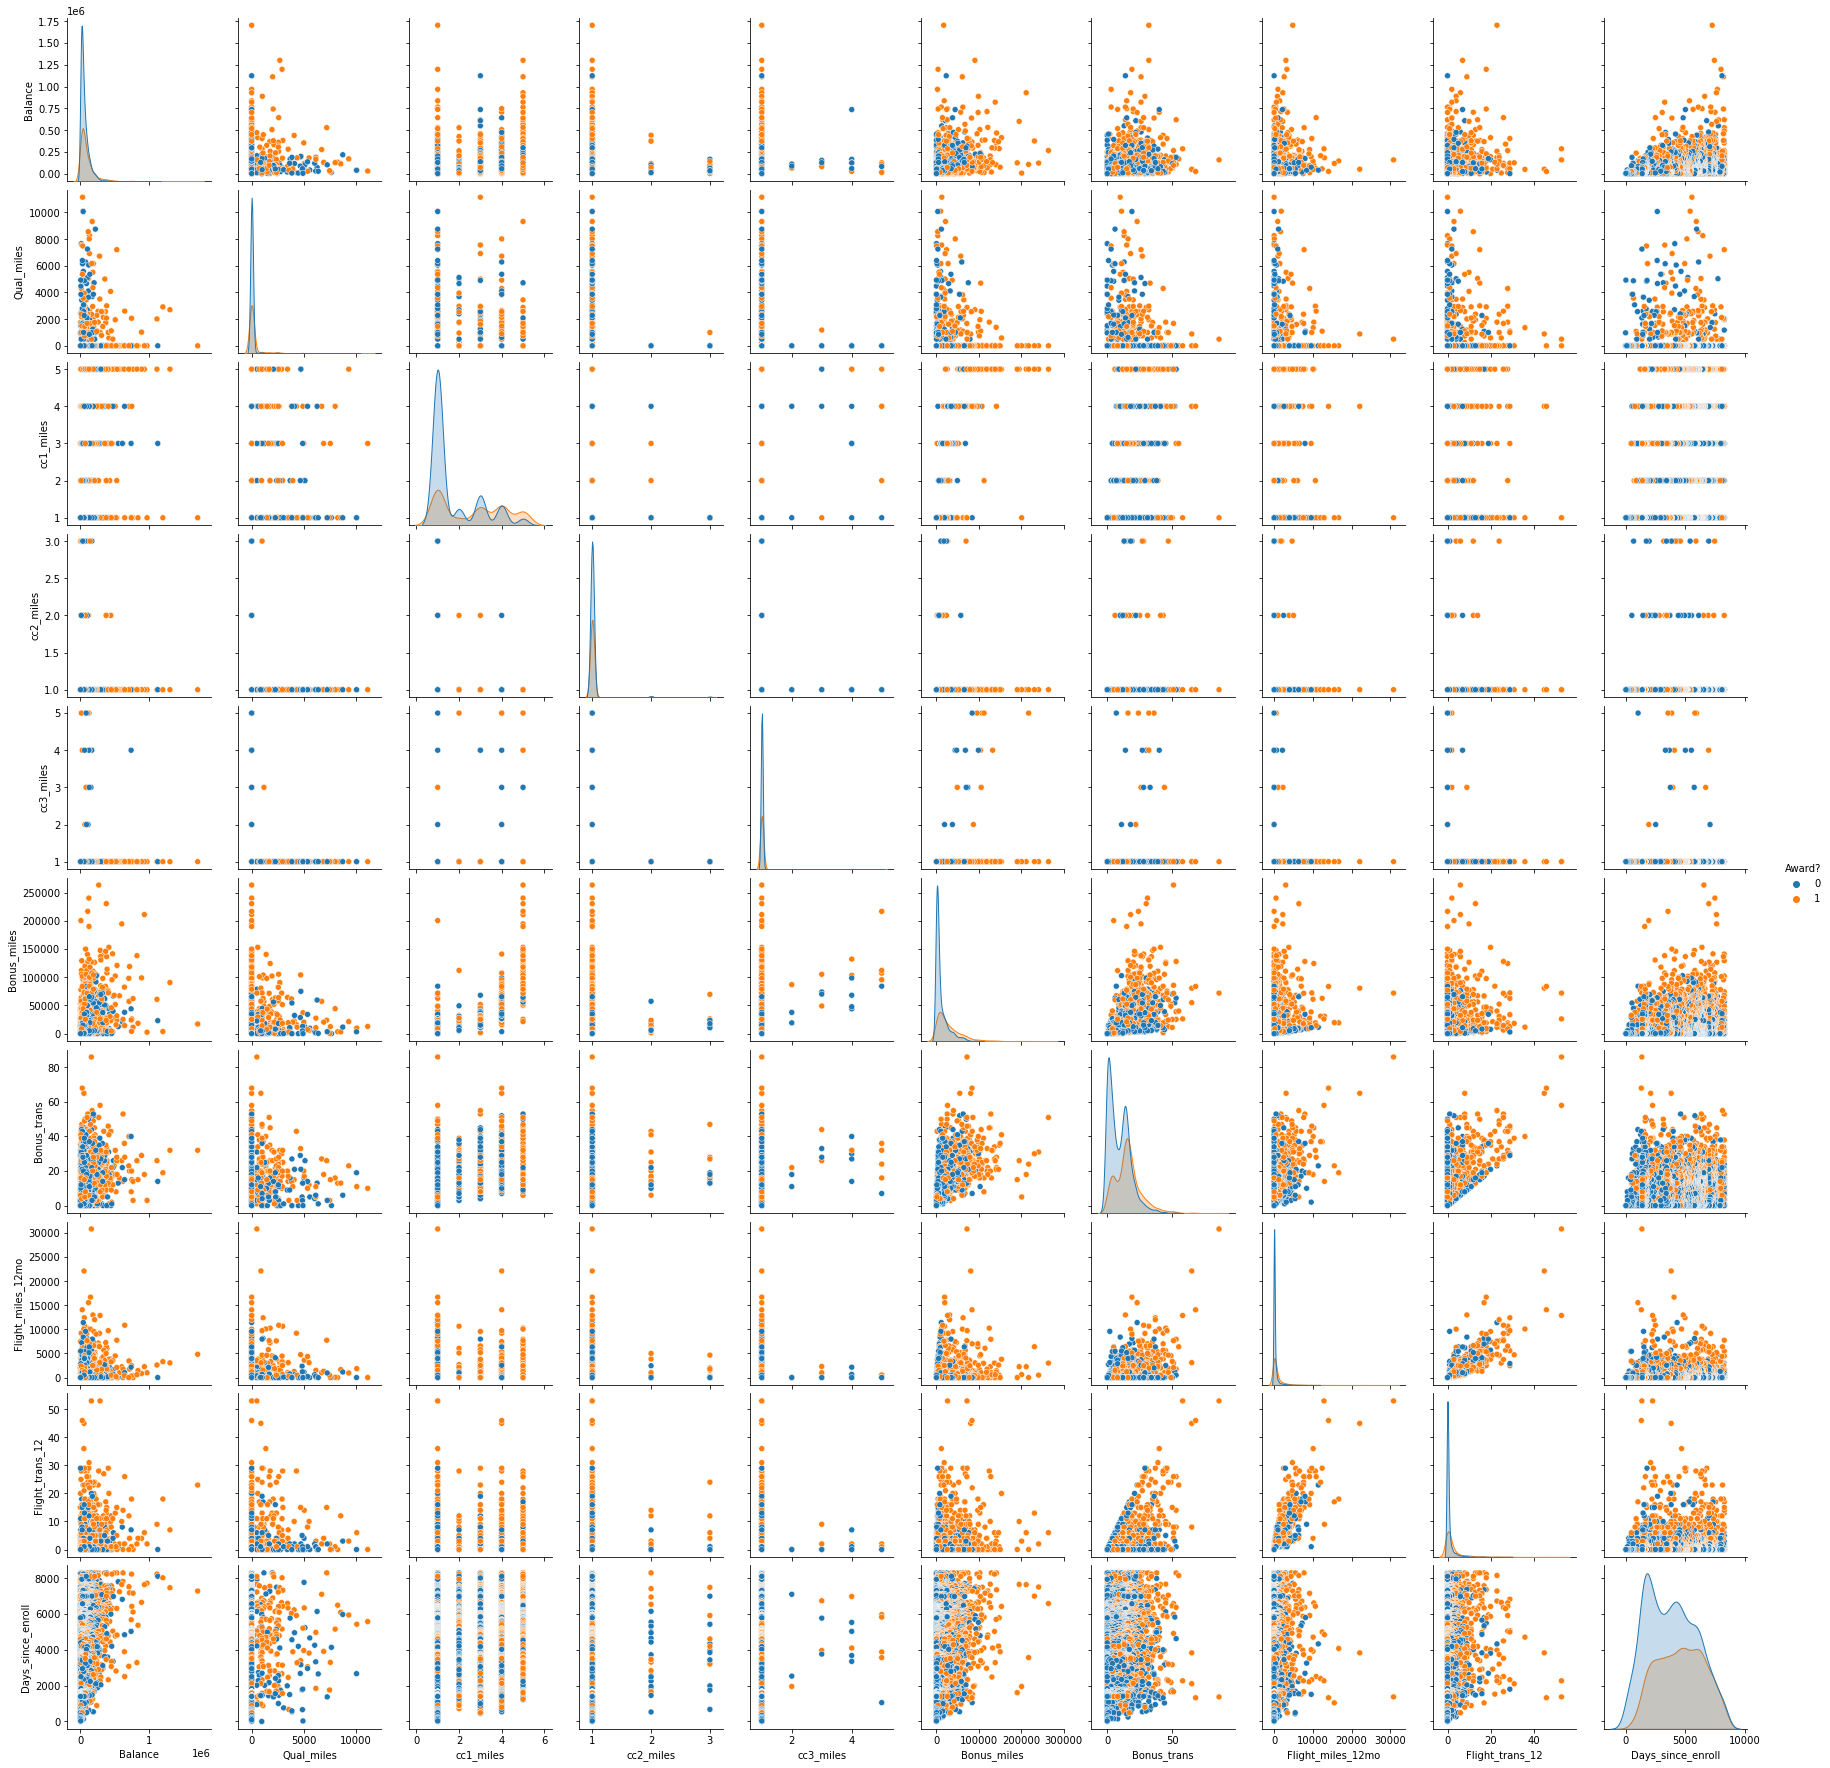

In [110]:
sns.pairplot(h_air,hue='Award?' );

In [111]:
h_air.sample(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1277,138254,0,1,1,1,24100,9,0,0,5420,1
588,31311,0,1,1,1,3961,10,0,0,6494,0
754,210018,0,4,1,1,48914,16,0,0,6217,1
211,31588,0,1,1,1,2947,8,0,0,7463,0
3452,24750,0,1,1,1,0,0,0,0,968,1


In [112]:
scaler= MinMaxScaler()

In [113]:
scl_h_air=scaler.fit_transform(h_air) # minmax scaling

In [114]:
scl_h_air

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# Dindogram Complete Method 

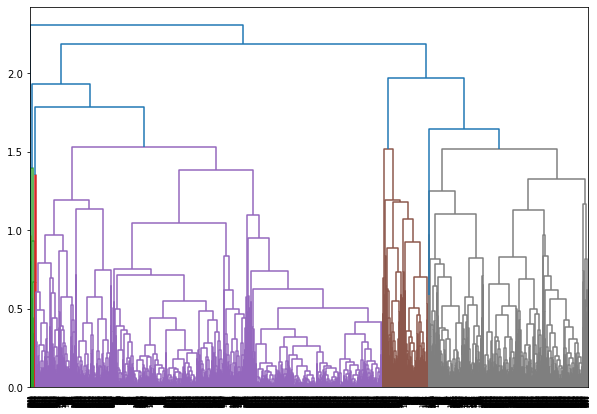

In [115]:
plt.figure(figsize=(10, 7))  
dendograms=shc.dendrogram(shc.linkage(scl_h_air,'complete'))  # min max scaler 

In [116]:
scaler2=StandardScaler()
std_sca= scaler2.fit_transform(h_air) # standard scaler

In [117]:
std_sca

array([[-4.51447032e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -3.62270357e-01,  1.39501502e+00, -7.67224055e-01],
       [-5.39752507e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -3.62270357e-01,  1.37951581e+00, -7.67224055e-01],
       [-3.20353244e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -3.62270357e-01,  1.41148292e+00, -7.67224055e-01],
       ...,
       [-4.03427630e-04, -1.86346909e-01,  6.82666501e-01, ...,
        -3.62270357e-01, -1.31637701e+00,  1.30340022e+00],
       [-1.85945147e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -9.86631083e-02, -1.31686136e+00, -7.67224055e-01],
       [-7.00784222e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -3.62270357e-01, -1.31831441e+00, -7.67224055e-01]])

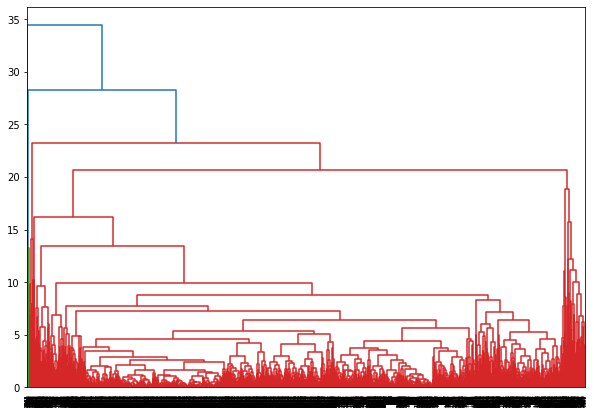

In [118]:
plt.figure(figsize=(10, 7))  
dendograms=shc.dendrogram(shc.linkage(std_sca,'complete')) # standard scaler 

#  AgglomerativeClustering  using minmax scaler

In [121]:
her_clucom = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [122]:
her_clucom

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [123]:
pred_hc=her_clucom.fit_predict(scl_h_air)

In [124]:
pred_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [125]:
clusters1 = pd.DataFrame(pred_hc,columns=['clusters'])
clusters1.value_counts()


clusters
0           2493
2           1144
1            325
4             31
3              4
dtype: int64

In [126]:
h_air['clusters1']=clusters1

In [127]:
h_air.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1
0,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0


In [128]:
h_air.mean()

Balance              73637.655492
Qual_miles             144.186640
cc1_miles                2.060045
cc2_miles                1.014511
cc3_miles                1.012259
Bonus_miles          17153.425069
Bonus_trans             11.607706
Flight_miles_12mo      460.285964
Flight_trans_12          1.374281
Days_since_enroll     4119.821116
Award?                   0.370528
clusters1                0.688110
dtype: float64

In [129]:
h_air[h_air['clusters1']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1
0,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0,0.0
5,16420,0,1,1,1,0,0,0,0,6942,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0.0
3990,11310,0,1,1,1,5021,2,0,0,1409,0,0.0
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0.0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0.0


In [130]:
h_air[h_air['clusters1']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0
11,96522,0,5,1,1,61105,19,0,0,6924,1,1.0
15,28495,0,4,1,1,49442,15,0,0,6912,1,1.0
16,51890,0,4,1,1,48963,16,0,0,6910,1,1.0
20,120576,0,5,1,1,58831,23,250,2,6896,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3752,15682,0,1,1,1,5025,6,500,1,3298,1,1.0
3771,48296,0,3,1,1,31329,9,500,1,3061,0,1.0
3845,4351,0,1,1,1,0,0,0,0,1659,0,1.0
3854,37165,0,3,1,1,19715,15,0,0,1654,0,1.0


In [131]:
h_air[h_air['clusters1']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1
7,20856,0,1,1,1,5250,4,250,1,6938,1,2.0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,2.0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,2.0
17,13958,0,1,1,1,4291,5,0,0,6905,1,2.0
18,91473,0,3,1,1,27408,17,0,0,6903,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3985,59017,0,4,1,1,34746,25,0,0,1418,0,2.0
3987,11933,0,1,1,1,249,3,79,1,1412,1,2.0
3992,11181,0,1,1,1,929,12,0,0,1407,0,2.0
3993,3974,0,1,1,1,365,3,0,0,1397,0,2.0


In [132]:
h_air[h_air['clusters1']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3.0
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3.0
3582,1625,0,1,1,1,1250,3,0,0,1381,0,3.0
3593,9794,0,1,1,1,2250,11,0,0,968,0,3.0


In [133]:
h_air[h_air['clusters1']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1
198,8669,0,1,3,1,11397,16,0,0,7486,1,4.0
381,167670,0,1,3,1,15907,13,0,0,6994,0,4.0
794,55610,0,1,2,1,5095,13,0,0,6151,0,4.0
940,44824,0,1,3,1,21107,19,2000,4,5916,1,4.0
1149,84856,0,1,2,1,6894,13,0,0,5547,0,4.0
1270,16103,0,1,3,1,10819,13,0,0,5427,0,4.0
1389,49145,0,1,2,1,12755,22,2450,7,5323,0,4.0
1527,23965,0,1,2,1,7308,16,550,3,5003,0,4.0
1541,36887,0,1,2,1,9048,11,0,0,4951,0,4.0
1791,32510,0,1,3,1,14568,13,0,0,4341,0,4.0


In [134]:
h_air.groupby('clusters1').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters1,,,,,,,,,,,
0.0,61328.415094,92.657166,1.745885,1.003613,1.011240,10940.980731,9.435568,269.792051,0.773986,3830.715777,0.035327
1.0,152649.572308,203.510769,4.596923,1.000000,1.061538,68624.686154,22.843077,966.356923,3.009231,5767.135385,0.984615
2.0,78793.658217,242.548951,2.055070,1.007867,1.000874,16163.920455,13.000000,702.737762,2.121503,4301.367133,0.930944
3.0,87921.000000,222.000000,1.750000,1.000000,1.000000,27589.250000,34.250000,8743.250000,24.500000,2113.000000,0.500000
4.0,45160.387097,32.258065,1.000000,2.290323,1.000000,12995.225806,14.774194,459.354839,1.967742,3815.419355,0.193548


In [136]:
silhouette_score_min= silhouette_score(scl_h_air, her_clucom.labels_)
silhouette_score_min

0.4166381959836202